In [2]:
# radon transform
# voting to choose the line in one cluster

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
import cv2

from src import dasly

In [3]:
das = dasly.Dasly()
das.load_data(
    folder_path='/media/kptruong/yellow02/Aastfjordbrua/',
    # start='20230901 103015',  # full 2 lines
    # start='20230901 163015',  # part of a line
    # start='20230901 183015',  # noise
    start='20230901 104015',  # 2 cars close to each other
    duration=60
)

Welcome to Dasly!
7 files, from 104014 to 104114


In [4]:
das.signal

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
10:40:15,0.000009,3.750074e-06,-0.000011,-3.509427e-06,7.259501e-06,8.823703e-07,-0.000006,-0.000002,1.243340e-06,2.005387e-06,...,-8.743487e-06,-7.600417e-06,-6.978747e-06,-6.818316e-06,-3.369050e-06,1.403771e-07,3.228673e-06,0.000003,-1.082909e-06,-2.286141e-06
10:40:15.001000,-0.000011,-6.818316e-07,0.000021,-2.947919e-06,-1.303502e-05,7.119124e-06,0.000006,-0.000004,-5.414545e-07,2.988027e-06,...,1.042801e-05,1.213259e-05,6.417238e-06,2.366357e-06,1.965279e-06,-8.021548e-08,8.422625e-07,0.000003,3.328942e-06,1.363663e-06
10:40:15.002000,0.000003,6.236754e-06,0.000002,2.205926e-07,4.010774e-08,-6.397184e-06,-0.000007,-0.000001,4.010774e-07,-6.016161e-08,...,-1.004699e-05,-1.341604e-05,-2.586949e-06,4.933252e-06,1.143071e-06,-1.824902e-06,-3.268781e-06,-0.000004,-2.566895e-06,3.609697e-07
10:40:15.003000,0.000006,-1.429841e-05,-0.000033,6.216700e-06,2.169829e-05,4.572282e-06,0.000004,0.000004,-2.045495e-06,-2.988027e-06,...,6.437292e-06,5.214006e-06,-7.018854e-07,-2.667165e-06,-2.005387e-08,7.620470e-07,3.268781e-06,0.000003,0.000000e+00,1.483986e-06
10:40:15.004000,0.000005,4.933252e-06,0.000001,-2.787488e-06,-2.707272e-06,-3.950612e-06,-0.000006,0.000002,1.644417e-06,-1.403771e-06,...,-5.173898e-06,-9.224780e-07,4.111043e-06,-4.411851e-07,-3.629750e-06,-4.010774e-08,-6.076323e-06,-0.000007,6.016161e-08,-3.208619e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10:41:14.995000,0.000002,-6.778208e-06,-0.000005,2.157796e-05,6.116430e-06,-1.786800e-05,-0.000008,0.000002,3.369050e-06,-3.810235e-07,...,1.008710e-05,9.104457e-06,-8.623164e-07,-4.131097e-06,-2.486680e-06,-5.013467e-07,1.584256e-06,0.000003,-1.263394e-06,-2.145764e-06
10:41:14.996000,-0.000006,1.249356e-05,0.000018,-1.804848e-05,-1.991349e-05,2.947919e-06,0.000008,0.000002,6.016161e-08,4.211313e-07,...,-5.615083e-06,-3.750074e-06,-1.604310e-07,-3.008080e-07,5.615083e-07,5.013467e-07,1.143071e-06,0.000001,-5.414545e-07,-7.620470e-07
10:41:14.997000,0.000006,-1.738670e-05,-0.000020,2.560879e-05,2.035468e-05,-7.660578e-06,-0.000005,0.000004,1.343609e-06,-2.306195e-06,...,-3.649804e-06,-5.675245e-06,-6.016161e-08,5.053575e-06,1.684525e-06,-1.524094e-06,-4.632444e-06,-0.000006,1.544148e-06,3.649804e-06
10:41:14.998000,0.000027,1.357647e-05,-0.000027,-2.221969e-05,2.667165e-06,1.349625e-05,-0.000003,-0.000009,-1.002693e-07,3.970666e-06,...,2.426518e-06,4.191259e-06,1.423825e-06,-1.985333e-06,-7.219393e-07,8.823703e-07,2.887757e-06,0.000002,-2.426518e-06,-4.411851e-07


Heatmap with vmin -8.4e-06, vmax 8.4e-06


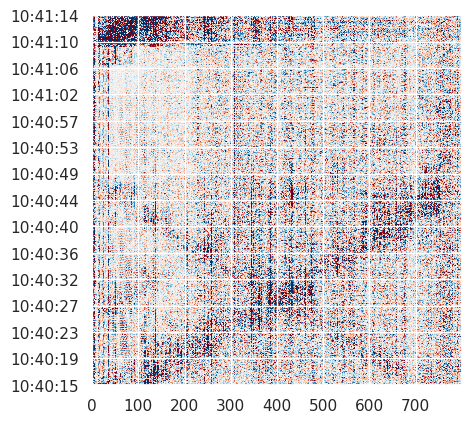

In [5]:
das.heatmap()

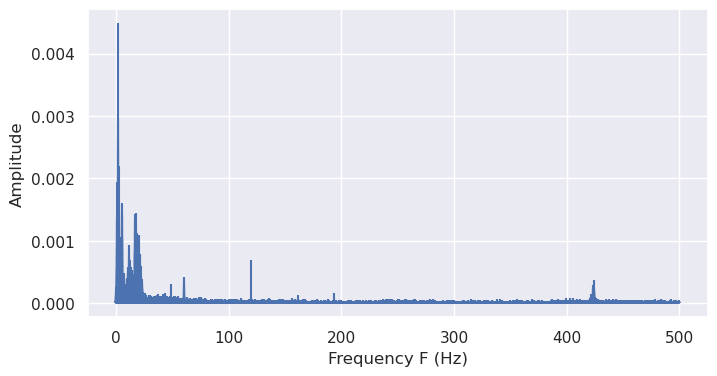

In [88]:
das.fft()

Heatmap with vmin -1.07e-05, vmax 1.07e-05


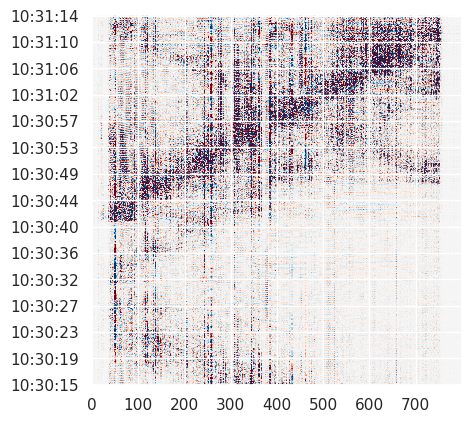

In [89]:
das.reset()
das.decimate(30)
das.heatmap()

In [90]:
das.signal.shape

(6000, 800)

Heatmap with vmin -6.86e-08, vmax 6.86e-08


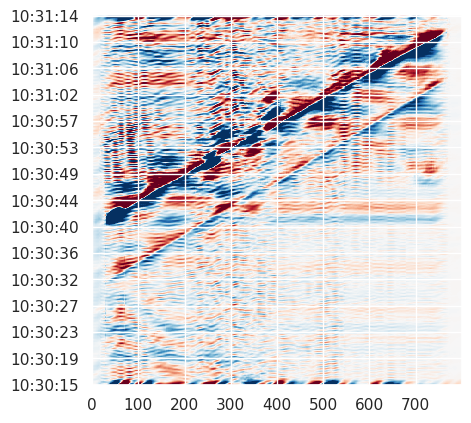

In [91]:
das.convolve(90, 95, 10)
das.heatmap()

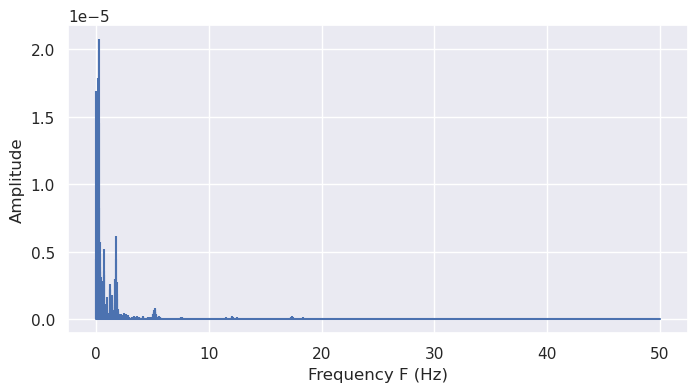

In [92]:
das.fft()

Heatmap with vmin -5.7e-08, vmax 5.7e-08


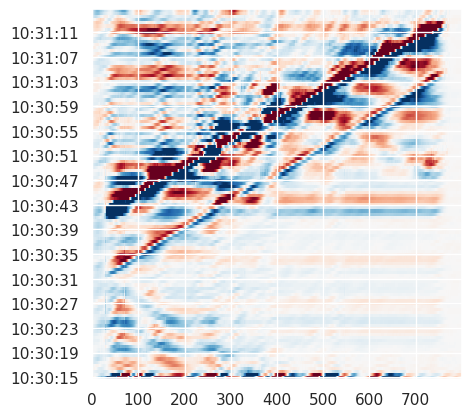

In [93]:
das.decimate(1)
das.heatmap()

In [94]:
das.signal.shape

(120, 800)

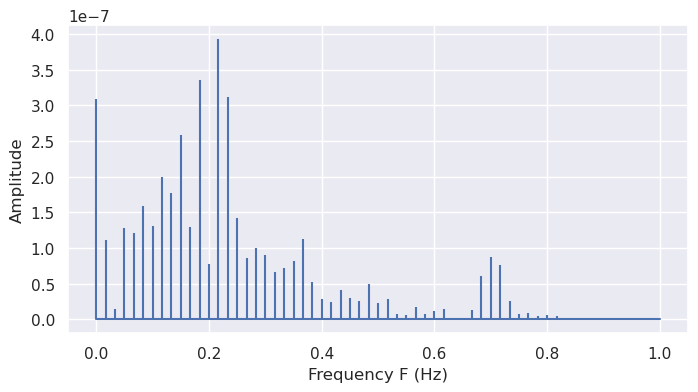

In [95]:
das.fft()

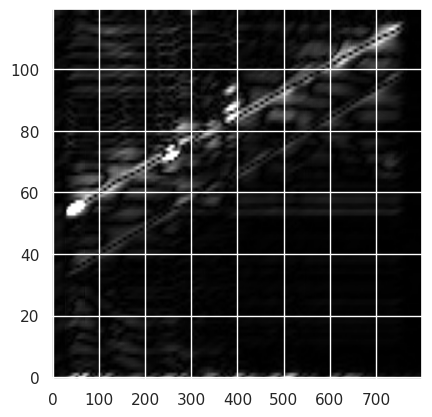

In [96]:
image = das.signal.to_numpy() / np.quantile(das.signal, 0.5)
# Canny needs input as 8-bit unsigned integer 
scaled_image = cv2.convertScaleAbs(image)

plt.imshow(
    scaled_image,
    cmap='gray',
    origin='lower',
    aspect=scaled_image.shape[1] / scaled_image.shape[0]
);

In [97]:
pd.Series(scaled_image.ravel()).describe()

count    96000.000000
mean        18.234719
std         28.863614
min          0.000000
25%          3.000000
50%          8.000000
75%         22.000000
max        255.000000
dtype: float64

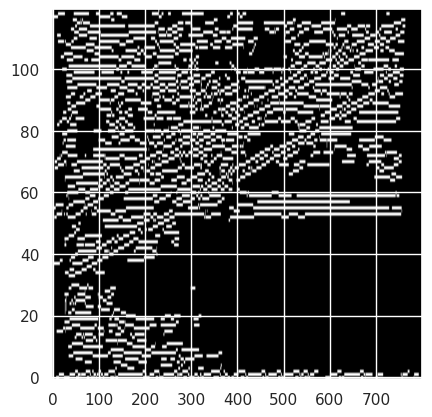

In [98]:
# threshold1 = np.quantile(scaled_image, 0.95)  # ~ 100
# threshold2 = np.quantile(scaled_image, 0.99)  # ~ 100

threshold1 = np.quantile(scaled_image, 0.90)  # ~ 100
threshold2 = np.quantile(scaled_image, 0.95)  # ~ 100

edges = cv2.Canny(scaled_image, threshold1, threshold2)
plt.imshow(
    edges,
    cmap='gray',
    origin='lower',
    aspect=edges.shape[1] / edges.shape[0]
);

In [99]:
rho = 0.1
theta = np.pi / (360 * 10)  # angular resolution
threshold = 45
lines = cv2.HoughLines(edges, rho, theta, threshold)
print(len(lines))

691


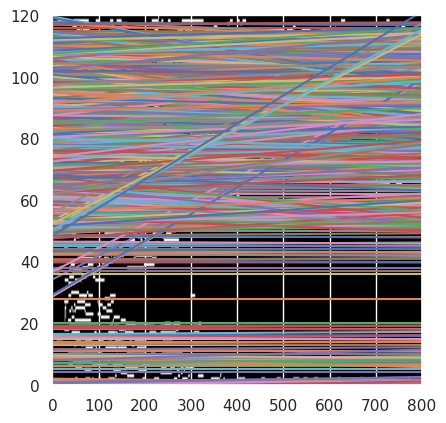

In [100]:
plt.imshow(
    edges,
    cmap='gray',
    origin='lower',
    aspect=edges.shape[1] / edges.shape[0]
);

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 10000 * (-b))
    y1 = int(y0 + 10000 * (a))
    x2 = int(x0 - 10000 * (-b))
    y2 = int(y0 - 10000 * (a))
    plt.plot([x1, x2], [y1, y2])

plt.xlim(0, edges.shape[1])
plt.ylim(0, edges.shape[0]);

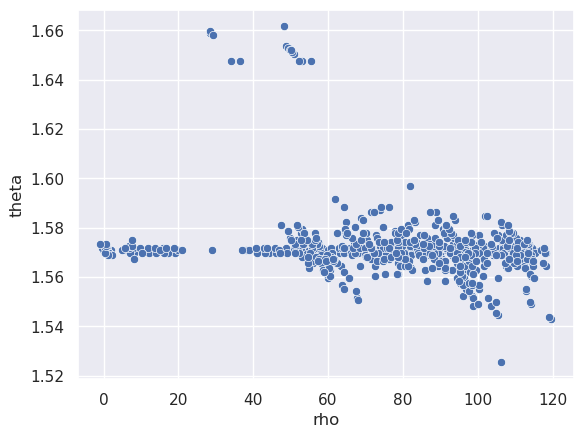

In [101]:
x = np.squeeze(lines)[:, 0]
y = np.squeeze(lines)[:, 1]

sns.scatterplot(x=x, y=y)
plt.xlabel('rho');
plt.ylabel('theta');

In [102]:
from sklearn.cluster import DBSCAN

In [103]:
points = np.squeeze(lines).copy()
points[:, 1] *= 100

In [104]:
time_space = 2  # time between car in seconds
pixel_space = (time_space / das.duration) * len(das.signal)

In [105]:
eps: float = pixel_space
min_samples: int = 1
cluster = DBSCAN(
    eps=eps,
    min_samples=min_samples,
    metric='euclidean'
)

cluster = cluster.fit(points)
cluster = cluster.labels_.copy()
cluster = [-1 if (i[1] <= 1.64) or (i[1] >= 1.68) else j for i, j in zip(np.squeeze(lines), cluster)]
cluster = [str(i) for i in cluster]

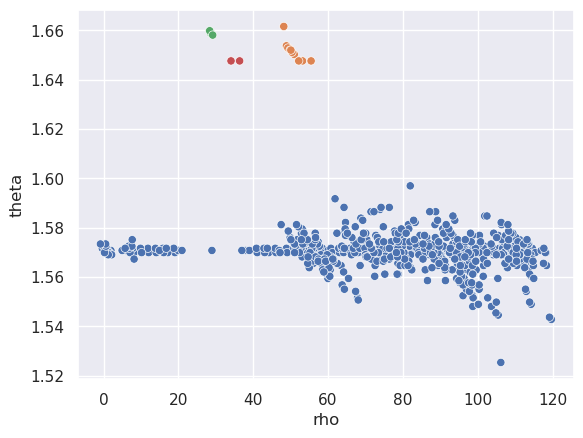

In [106]:
sns.scatterplot(x=x, y=y, hue=cluster)
plt.legend([],[], frameon=False)
plt.xlabel('rho')
plt.ylabel('theta');

# More robust methods?

Heatmap with vmin -3.57e-07, vmax 3.57e-07


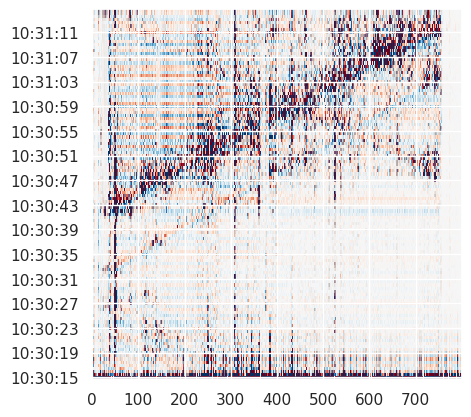

In [107]:
das.reset()
das.decimate(1)
das.heatmap()

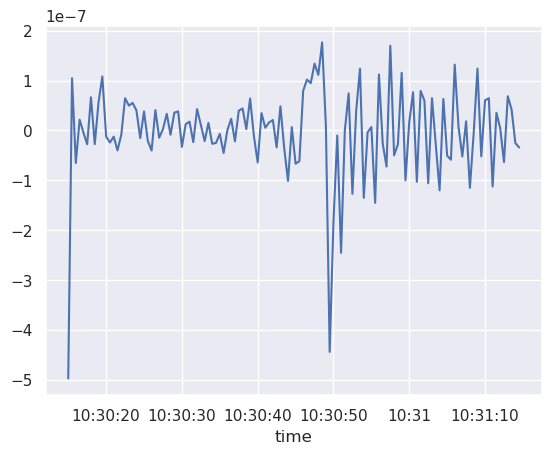

In [108]:
das.signal[200].plot();

Heatmap with vmin -6.56e-08, vmax 6.56e-08


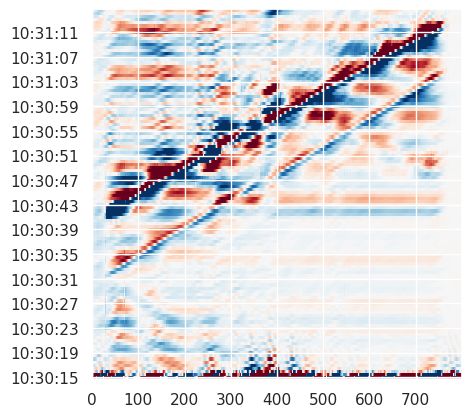

In [109]:
das.convolve(90, 95, 10)
das.heatmap()

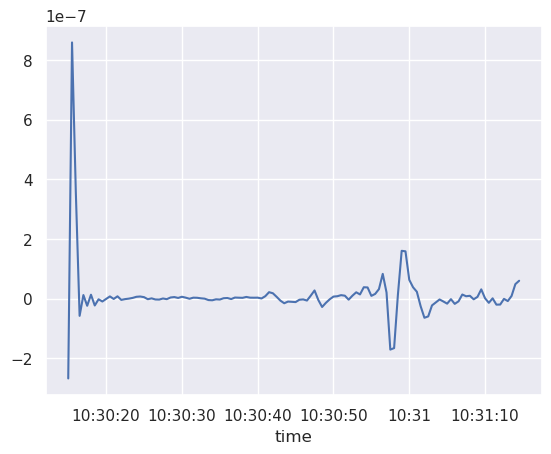

In [110]:
das.signal[400].plot();

# hough_line_peaks

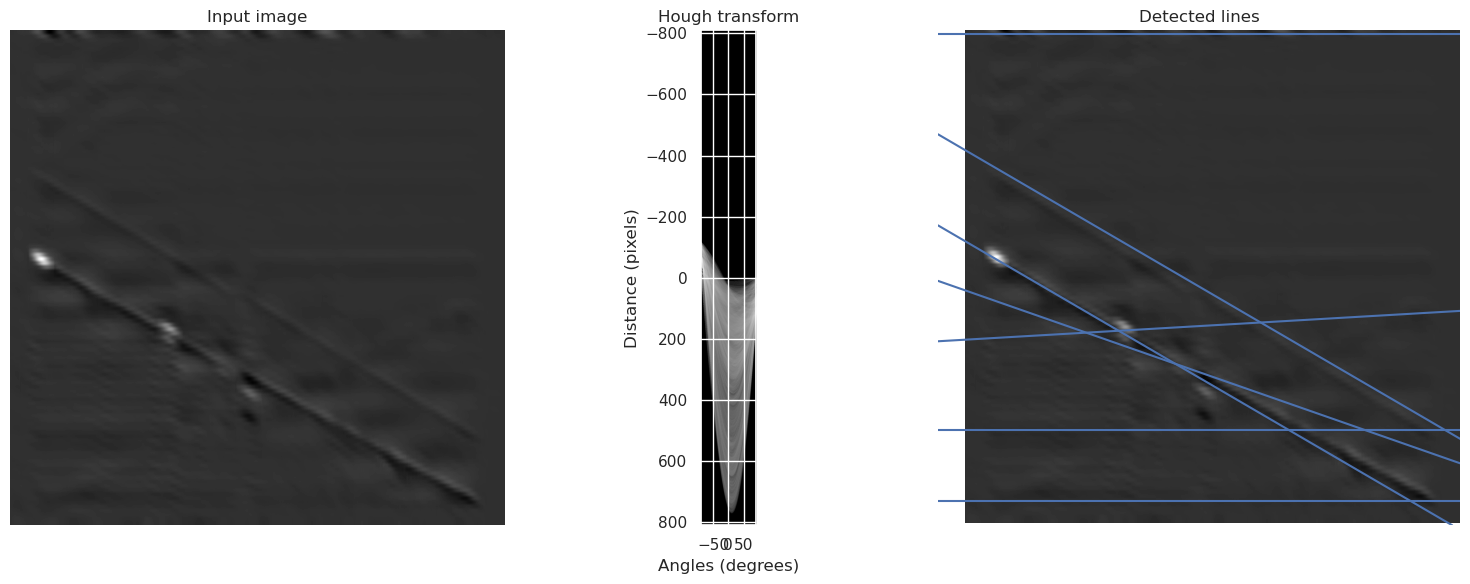

In [35]:
import numpy as np

from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.draw import line as draw_line
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm


# Constructing test image
# image = np.zeros((200, 200))
# idx = np.arange(25, 175)
# image[idx, idx] = 255
# image[draw_line(45, 25, 25, 175)] = 255
# image[draw_line(25, 135, 175, 155)] = 255

# Classic straight-line Hough transform
# Set a precision of 0.5 degree.
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(edges, theta=tested_angles)

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray, aspect=edges.shape[1] / edges.shape[0])
ax[0].set_title('Input image')
ax[0].set_axis_off()

angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [np.rad2deg(theta[0] - angle_step),
          np.rad2deg(theta[-1] + angle_step),
          d[-1] + d_step, d[0] - d_step]
ax[1].imshow(np.log(1 + h), aspect=edges.shape[1] / edges.shape[0], extent=bounds, cmap=cm.gray)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray, aspect=edges.shape[1] / edges.shape[0])
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax[2].axline((x0, y0), slope=np.tan(angle + np.pi/2))

plt.tight_layout()
plt.show()
# voting

# probabilistic_hough_line

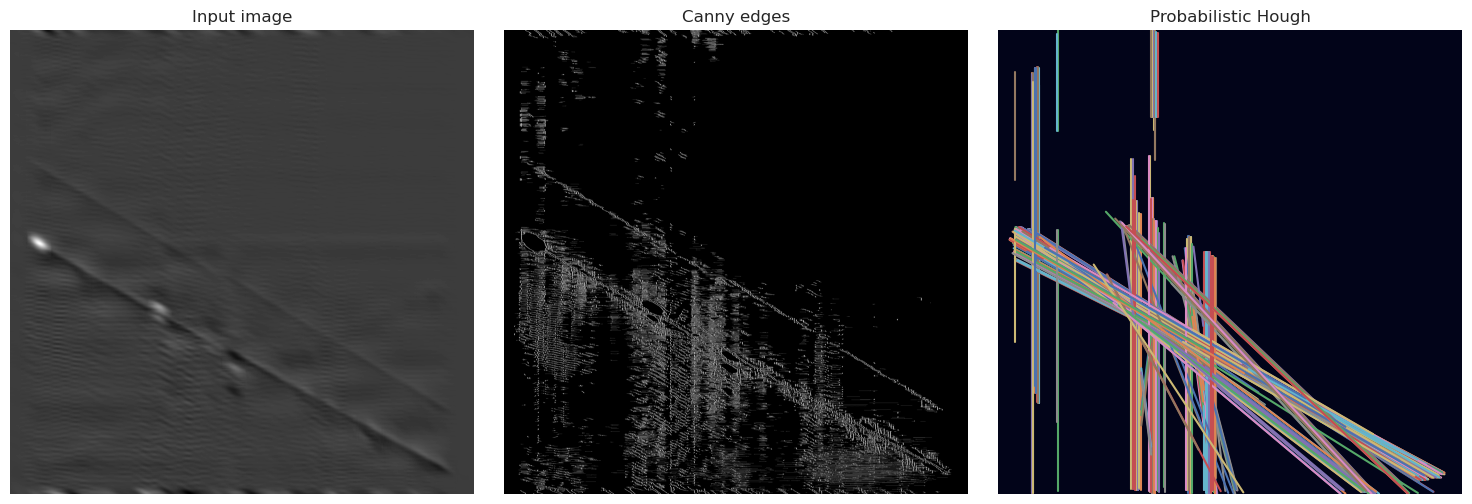

In [36]:
from skimage.transform import probabilistic_hough_line

# Line finding using the Probabilistic Hough Transform
# image = data.camera()
# edges = canny(image, 2, 1, 25)
lines = probabilistic_hough_line(edges, threshold=600, line_length=1000,
                                 line_gap=300)

# Generating figure 2
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap='gray', aspect=edges.shape[1] / edges.shape[0])
ax[0].set_title('Input image')

ax[1].imshow(edges, cmap='gray', aspect=edges.shape[1] / edges.shape[0])
ax[1].set_title('Canny edges')

ax[2].imshow(edges * 0, aspect=edges.shape[1] / edges.shape[0])
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough')

for a in ax:
    a.set_axis_off()

plt.tight_layout()
plt.show()